In [1]:
# Import Python packages
import pickle

# Import Third party packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S1_terms = ['u', 'du/dx', 'f']
S2_terms = ['u', 'du/dx', 'f', 'u^{2}']
S3_terms = ['du/dx', 'f']
S4_terms = ['f']

true_terms = [S1_terms, S2_terms, S3_terms, S4_terms]
tags = ["S1", "NLSL", "S3", "S4"]

In [3]:
def compute_spurious_terms(results, true_terms):
    # Count the number of incorrectly ID'ed terms and missing terms
    for result in results:
        coeffs = result['coeffs']
        spurious_terms = 0
        # Count the incorrect terms identified
        for term in coeffs:
            if term not in true_terms:
                # if it isn't, increment counter
                spurious_terms += 1
        # Count if any terms are missing from learned model
        for term in true_terms:
            if term not in coeffs:
                # if it isn't, increment counter
                spurious_terms += 1
        result['spurious'] = spurious_terms
    return results

In [4]:
# Create empty list for plotting
plot_lists = []

# Prepare the results list
for tag, true_term in zip(tags, true_terms):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig4b-{}-".format(tag)
    results = pickle.load(open(file_stem +"results.pickle", "rb"))
    results = compute_spurious_terms(results, true_term)
    print(tag, results[-1]['coeffs'].keys())
    # Prepare lists for plotting
    plot_trials = [result['num_trials'] for result in results]
    plot_losses = [result['loss']/result['num_trials'] for result in results]
    min_loss = min(plot_losses)
    plot_losses = [loss-min_loss for loss in plot_losses]
    plot_spurious = [result['spurious'] for result in results]
    # save to plot_lists:
    plot_lists.append([plot_trials, plot_losses, plot_spurious])

S1 dict_keys(['u', 'du/dx', 'f'])
NLSL dict_keys(['u', 'u^{2}', 'du/dx', 'f'])
S3 dict_keys(['du/dx', 'f'])
S4 dict_keys(['u', 'u^{2}', 'u^{3}', 'u^{4}', 'u^{5}', 'x', 'du/dx', 'd^{2}u/dx^{2}', 'd^{3}u/dx^{3}', 'u*du/dx', 'u*d^{2}u/dx^{2}', 'u*d^{3}u/dx^{3}', 'u^{2}*du/dx', 'u^{2}*d^{2}u/dx^{2}', 'u^{2}*d^{3}u/dx^{3}', 'u^{3}*du/dx', 'u^{3}*d^{2}u/dx^{2}', 'u^{3}*d^{3}u/dx^{3}', 'u^{4}*du/dx', 'u^{4}*d^{2}u/dx^{2}', 'u^{4}*d^{3}u/dx^{3}', 'u^{5}*du/dx', 'u^{5}*d^{2}u/dx^{2}', 'u^{5}*d^{3}u/dx^{3}', 'f'])


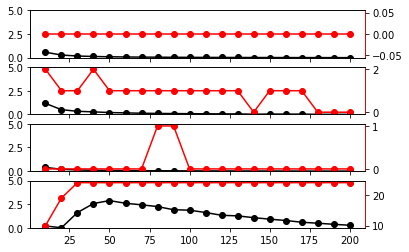

In [5]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20
pltstyle=dict(linestyle=None,marker='o')
figsize = (6,4)


# Create figure
fig, axs = plt.subplots(4,1, sharex=True, figsize=figsize)

axs = axs.flatten()

for ax1, plot_list in zip(axs,plot_lists):
    # Get the results:
    plot_trials, plot_losses, plot_spurious = plot_list
    
    # set axes
    ax1.autoscale(False, axis='y')
    ax2 = ax1.twinx()
    
    ax1.plot(plot_trials, plot_losses, color='black', label = "PDE Find Loss Error", **pltstyle)
    ax2.plot(plot_trials, plot_spurious, color='red', label="# Spurious Terms", **pltstyle)
    
    ax2.spines['right'].set_color('red')
    
    # Place the legend
    lines = ax1.get_lines()+ax2.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]
    
    # adjust axis scales
    ax1.set_ylim([0,5])


# Turn off all the tick labels
#ax1.tick_params(labelbottom=False, labelleft=False)
#ax2.tick_params(labelright=False)
#ax2.tick_params(axis='y', colors='red')
## Save figure
#plt.savefig('./Figs/4a-NLSL-noise-vs-error.svg', dpi=600, transparent=True)

plt.show()

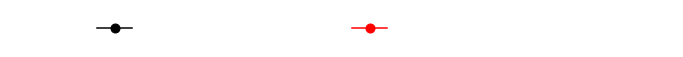

In [6]:
# Create separate axes
legend_figsize = (figsize[0]*2, figsize[1]/5)
plt.figure(figsize=legend_figsize)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
plt.legend(lines, labels, ncol=2, loc='center', frameon=False)
#plt.savefig('./Figs/4-legend.svg', dpi=600, transparent=True)